## Dataset analysis

This notebooks looks at the following elements
* How does the sizing of the questions look
* Validation of the dataset. Does it contain the correct answers etc.?
* Distribution of categories along with the average document length for that category
* Where in the context is the answer located?

### How does the sizing of the questions look?

In [1]:
from transformers import BertTokenizerFast, BertForQuestionAnswering
import torch
import json
from datasets import load_dataset
train = load_dataset('cuad',split='train')

Using custom data configuration default
Reusing dataset cuad (/Users/gustavhartz/.cache/huggingface/datasets/cuad/default/1.0.0/01ed7dc61ab84230462731422e77cbb6f54ea8590b22a2d881b594f4d7f3746c)


In [2]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

In [159]:
with open('../cuad_training/data/train_datatest.json', 'r') as file:
    data = json.load(file)

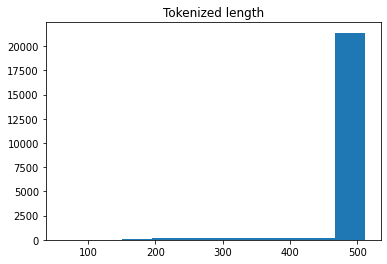

In [160]:
from matplotlib import pyplot as plt
plt.hist([len(tokenizer(x['context'],x['question'], truncation=True, padding=True)['input_ids']) for x in data['data']])
plt.title('Tokenized length')
plt.show()

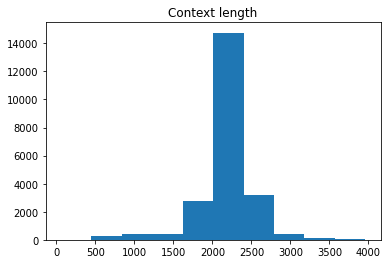

In [161]:
_dat = [len(x['context']) for x in data['data'] if len(x['context'])<4000]
plt.hist(_dat)
plt.title('Context length')
plt.show()

Looking at the small samples of the dataset

In [118]:
df=train.to_pandas()
df['conlen']=df.apply(lambda x: len(x['context']),axis=1)

In [119]:
def getLenFromTitle(title):
    return df[df['title']==title].head(1).conlen.values[0]

In [135]:
rs=[(x['original_id'],len(x['context']),getLenFromTitle(x['title']), x['is_impossible']) for x in data['data'] if len(x['context'])<500]

In [136]:
[x for x in data['data'] if len(x['context'])<100]

[{'start_positions': 1,
  'end_positions': 1,
  'question': 'Highlight the parts (if any) of this contract related to "Notice Period To Terminate Renewal" that should be reviewed by a lawyer. Details: What is the notice period required to terminate renewal?',
  'context': 'elby J. Butterfield Shelby J. Butterfield Co-Trustee\n\n1',
  'id': 132,
  'original_id': 'NELNETINC_04_08_2020-EX-1-JOINT FILING AGREEMENT__Notice Period To Terminate Renewal_0',
  'char_span_start': 1026,
  'is_impossible': True,
  'title': 'NELNETINC_04_08_2020-EX-1-JOINT FILING AGREEMENT',
  'answer': ''},
 {'start_positions': 1,
  'end_positions': 1,
  'question': 'Highlight the parts (if any) of this contract related to "Governing Law" that should be reviewed by a lawyer. Details: Which state/country\'s law governs the interpretation of the contract?',
  'context': 'helby J. Butterfield Shelby J. Butterfield Co-Trustee\n\n1',
  'id': 133,
  'original_id': 'NELNETINC_04_08_2020-EX-1-JOINT FILING AGREEMENT__Gover

In [137]:
sorted(rs,key=lambda x: x[1])

[('BLACKROCKMUNIHOLDINGSINVESTMENTQUALITYFUND_04_07_2020-EX-99.01-JOINT FILING AGREEMENT__Competitive Restriction Exception_0',
  1,
  1283,
  True),
 ('UNITEDNATIONALBANCORP_03_03_1999-EX-99-Outsourcing Agreement with the BISYS Group, Inc.__Cap On Liability_0',
  1,
  1952,
  True),
 ('NELNETINC_04_08_2020-EX-1-JOINT FILING AGREEMENT__Liquidated Damages_0',
  4,
  1081,
  True),
 ('VIRGINGALACTICHOLDINGS,INC_04_08_2020-EX-99.1-JOINT FILING STATEMENT__Unlimited/All-You-Can-Eat-License_0',
  4,
  1194,
  True),
 ('VIRGINGALACTICHOLDINGS,INC_04_08_2020-EX-99.1-JOINT FILING STATEMENT__Renewal Term_0',
  6,
  1194,
  True),
 ('BANGIINC_05_25_2005-EX-10-Premium Managed Hosting Agreement__Affiliate License-Licensor_0',
  17,
  2010,
  True),
 ('GALACTICOMMTECHNOLOGIESINC_11_07_1997-EX-10.46-WEB HOSTING AGREEMENT__Revenue/Profit Sharing_0',
  18,
  1660,
  True),
 ('SalesforcecomInc_20171122_10-Q_EX-10.1_10961535_EX-10.1_Reseller Agreement__Unlimited/All-You-Can-Eat-License_0',
  18,
  2935,


In [176]:
9.5e-6*2

1.9e-05

In [126]:
id_2_len = {x[0]:x[1] for x in rs}

In [127]:
df2=df['id'].isin([x[0] for x in rs ])

In [128]:
df3=df[df2]
df3['a_len']=df[df2].apply(lambda x: len(x['answers']['text']), axis=1)
df3['p_ctx_len']=df3.apply(lambda x: id_2_len.get(x['id']),axis=1)

/var/folders/nt/g2ndh3nx4dj16m34wq3h41lh0000gn/T/ipykernel_80015/2484139757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['a_len']=df[df2].apply(lambda x: len(x['answers']['text']), axis=1)
/var/folders/nt/g2ndh3nx4dj16m34wq3h41lh0000gn/T/ipykernel_80015/2484139757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['p_ctx_len']=df3.apply(lambda x: id_2_len.get(x['id']),axis=1)


In [158]:
df3[df3['a_len']==1].sort_values('p_ctx_len').head(5)[['id','p_ctx_len']].values

array([['BANUESTRAFINANCIALCORP_09_08_2006-EX-10.16-AGENCY AGREEMENT__Document Name_0',
        78],
       ['ETELOS,INC_03_09_2004-EX-10.8-DISTRIBUTOR AGREEMENT__Agreement Date_0',
        187],
       ['STARTECGLOBALCOMMUNICATIONSCORP_11_16_1998-EX-10.30-CONSTRUCTION AND MAINTENANCE AGREEMENT__Parties_26',
        334],
       ['VARIABLESEPARATEACCOUNT_04_30_2014-EX-13.C-UNCONDITIONAL CAPITAL MAINTENANCE AGREEMENT__Minimum Commitment_0',
        402],
       ['ON4COMMUNICATIONSINC_07_02_2009-EX-10.1-PROMOTION AGREEMENT__Agreement Date_0',
        495]], dtype=object)

In [22]:
df3[df3['a_len']==1].head(5)['id'].values

array(['SouthernStarEnergyInc_20051202_SB-2A_EX-9_801890_EX-9_Affiliate Agreement__Governing Law_0',
       'PelicanDeliversInc_20200211_S-1_EX-10.3_11975895_EX-10.3_Development Agreement1__Parties_1',
       'TELEGLOBEINTERNATIONALHOLDINGSLTD_03_29_2004-EX-10.10-CONSTRUCTION AND MAINTENANCE AGREEMENT__Parties_20',
       'TELEGLOBEINTERNATIONALHOLDINGSLTD_03_29_2004-EX-10.10-CONSTRUCTION AND MAINTENANCE AGREEMENT__Parties_33',
       'TELEGLOBEINTERNATIONALHOLDINGSLTD_03_29_2004-EX-10.10-CONSTRUCTION AND MAINTENANCE AGREEMENT__Parties_35'],
      dtype=object)

In [23]:
df3[df3['id']=='SouthernStarEnergyInc_20051202_SB-2A_EX-9_801890_EX-9_Affiliate Agreement__Governing Law_0']

,id,title,context,question,answers,conlen,a_len,p_ctx_len
2154,SouthernStarEnergyInc_20051202_SB-2A_EX-9_8018...,SouthernStarEnergyInc_20051202_SB-2A_EX-9_8018...,Exhibit 10.8 Affiliate Program / Premium Affil...,Highlight the parts (if any) of this contract ...,{'text': ['Even in case of agreements with for...,22721,1,425


Debugging 

In [24]:
from datasets import load_dataset
import random
import re
import string
import copy
from tqdm import tqdm
from transformers import BertTokenizerFast
import argparse
import json
import pandas as pd
import torch

In [154]:
def random_slice_index(l, tkn_start, tkn_end, slice_len=500):
    if len(l) <= slice_len:
        print("fse")
        return (0, len(l)-2)

    # Random start position some place before the start token but with space to cover the answer span

    # At begining of inputs or slice_len before end so we know there is an overlap
    start_loc = max(tkn_end-slice_len, 0)
    start = random.randint(start_loc, tkn_start)

    # Need to be within array
    # Zero indexed and the end element causes issues with token_to_ids
    end = min(start + slice_len, len(l)-2)
    return (start, end)


def check_match(str1, str2):
    if len(str1) > len(str2):
        str1, str2 = str2, str1
    count = 0
    i = 0
    while (i < len(str1)) and (i+1 < len(str2)):
        if str1[i] == str2[i]:
            count += 1
        elif str1[i] == str2[i+1]:
            count += 1
        elif str1[i] == str2[i-1]:
            count += 1
        i += 1
    return count

def normalize_answer(s):
    '''
    Performs a series of cleaning steps on the ground truth and 
    predicted answer.
    '''
    s = copy.deepcopy(s)

    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_punc(lower(s))).replace(" ", '').replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('\u200b', '')

### Debugging
For debugging insert the script from make_dataset here

## Validation of the dataset
Do we get the correct answers from our preprocessing

In [171]:
ds = []
for sample in data['data']:
    spl_len = len(sample['context'])
    ds.append(not sample['answer']==sample['context'][sample['start_positions']:sample['end_positions']])

In [172]:
sum(ds)

0